In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-06-15 04:27:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.71MB/s    in 49s     

2020-06-15 04:28:37 (6.27 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
import shutil, sys 
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

train_paper_dir = os.path.join(base_dir, 'paper')
train_rock_dir = os.path.join(base_dir, 'rock')
train_scissors_dir = os.path.join(base_dir, 'scissors')

validation_paper_dir = os.path.join(base_dir, 'paper')
validation_rock_dir = os.path.join(base_dir, 'rock')
validation_scissors_dir = os.path.join(base_dir, 'scissors')


In [5]:
print(len(train_paper_dir),len(train_rock_dir),len(train_scissors_dir))

42 41 45


In [7]:
print(len(validation_paper_dir),len(validation_rock_dir),len(validation_scissors_dir))

42 41 45


In [0]:
base_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    width_shift_range=20,
                    height_shift_range=20,
                    validation_split=0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [9]:
train_generator = base_datagen.flow_from_directory(
        base_dir, 
        target_size=(100, 150), 
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical',
        subset='training'
        )

validation_generator = base_datagen.flow_from_directory(
        base_dir, 
        target_size=(100, 150),
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical',
        subset='validation'
        )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
mdl = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
mdl.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [12]:
mdl.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5, 
      verbose=1)

Epoch 1/20
25/25 [==============================] - 24s 962ms/step - loss: 1.1274 - accuracy: 0.3338 - val_loss: 1.0957 - val_accuracy: 0.3875
Epoch 2/20
25/25 [==============================] - 24s 972ms/step - loss: 1.1056 - accuracy: 0.3426 - val_loss: 1.0973 - val_accuracy: 0.3562
Epoch 3/20
25/25 [==============================] - 24s 966ms/step - loss: 1.1016 - accuracy: 0.3450 - val_loss: 1.0839 - val_accuracy: 0.4812
Epoch 4/20
25/25 [==============================] - 24s 974ms/step - loss: 1.0990 - accuracy: 0.4650 - val_loss: 0.8888 - val_accuracy: 0.5562
Epoch 5/20
25/25 [==============================] - 24s 978ms/step - loss: 0.9476 - accuracy: 0.5688 - val_loss: 0.8312 - val_accuracy: 0.6125
Epoch 6/20
25/25 [==============================] - 24s 954ms/step - loss: 0.7648 - accuracy: 0.6625 - val_loss: 0.6066 - val_accuracy: 0.7688
Epoch 7/20
25/25 [==============================] - 24s 959ms/step - loss: 0.6812 - accuracy: 0.7337 - val_loss: 0.6679 - val_accuracy: 0.6562

Using TensorFlow backend.


Saving 16621.jpg to 16621.jpg
paper


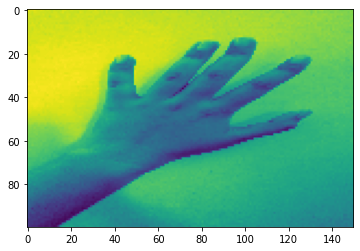

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, color_mode = "grayscale", target_size=(100,150,1))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  y = mdl.predict(images, batch_size=10)
  labels = ['paper', 'rock', 'scissors']
  print(labels[np.argmax(y)])